<a href="https://colab.research.google.com/github/luisovillista/Proyecto_Integrador/blob/main/LimpiezaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obesity or CVD risk (Classify/Regressor/Cluster)

About Dataset The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records. The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS) variables obtained : Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5 •Normal 18.5 to 24.9 •Overweight 25.0 to 29.9 •Obesity I 30.0 to 34.9 •Obesity II 35.0 to 39.9 •Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

Importación de Librerías y Carga de Datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de estilo para las gráficas
sns.set(style="whitegrid")

# Cargar el conjunto de datos
data = pd.read_csv('https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle).csv')



In [5]:

# Configuraciones de estilo para las gráficas
sns.set(style="whitegrid")


# Mostrar los nombres de las columnas antes de la limpieza
print("Nombres de las columnas antes de la limpieza:")
print(data.columns)



Nombres de las columnas antes de la limpieza:
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


Limpieza de Datos

In [6]:
# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, drop_first=True)

# Crear una nueva columna para el género con etiquetas 'Hombre' y 'Mujer'
data['Gender'] = data['Gender_Male'].apply(lambda x: 'Hombre' if x else 'Mujer')

# Calcular el IMC
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Mostrar los nombres de las columnas después de la limpieza
print("Nombres de las columnas después de la limpieza:")
print(data.columns)


Nombres de las columnas después de la limpieza:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II',
       'Gender', 'BMI'],
      dtype='object')


Análisis Descriptivo
Histogramas y Densidades de Variables Continuas

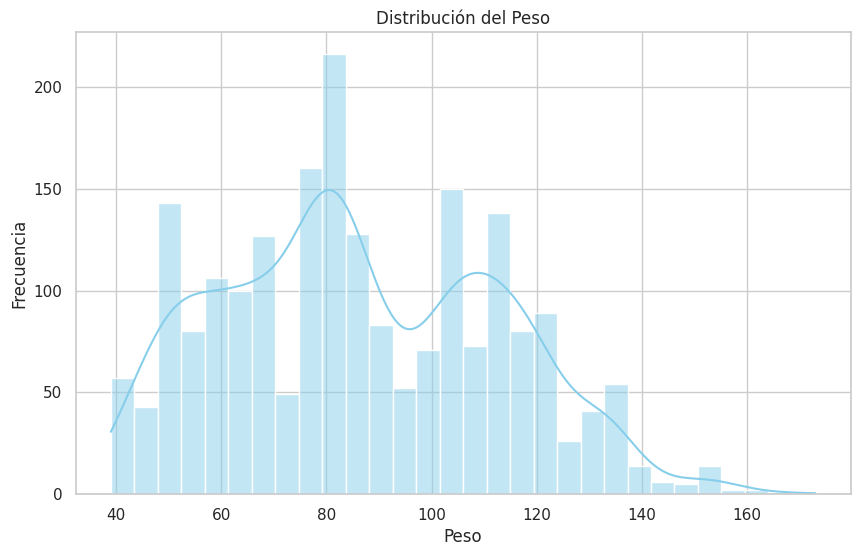

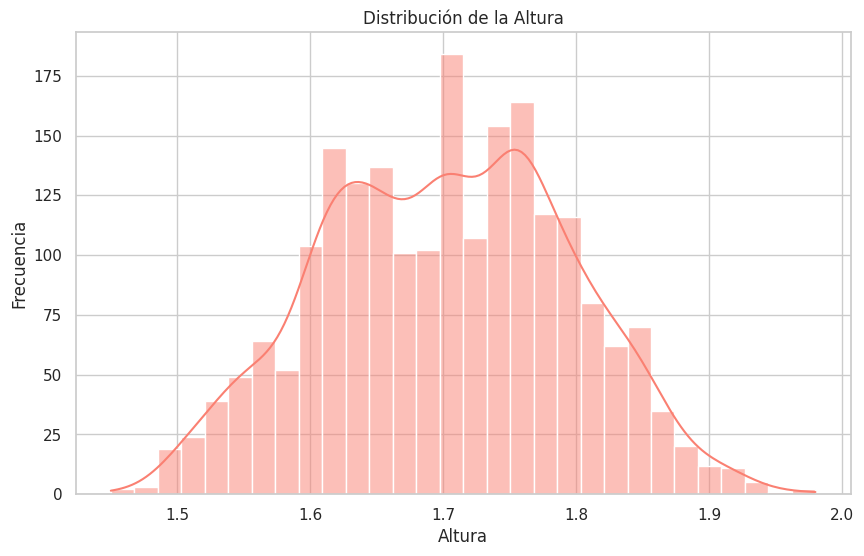

In [7]:
# Peso
plt.figure(figsize=(10, 6))
sns.histplot(data['Weight'], kde=True, bins=30, color='skyblue')
plt.title('Distribución del Peso')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

# Altura
plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], kde=True, bins=30, color='salmon')
plt.title('Distribución de la Altura')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()


Gráficos de Barras para Variables Categóricas

<ipython-input-8-5c8cc437a60b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='family_history_with_overweight_yes', data=data, palette='viridis')


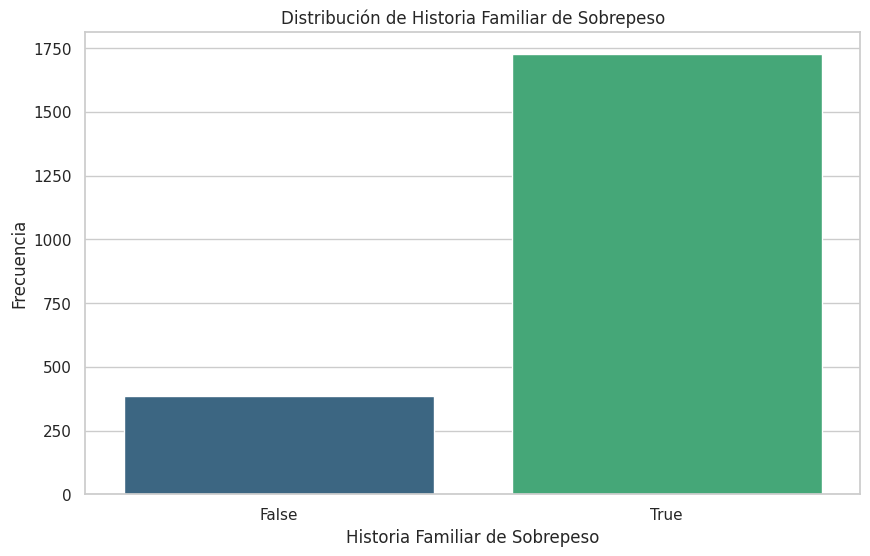

<ipython-input-8-5c8cc437a60b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SMOKE_yes', data=data, palette='magma')


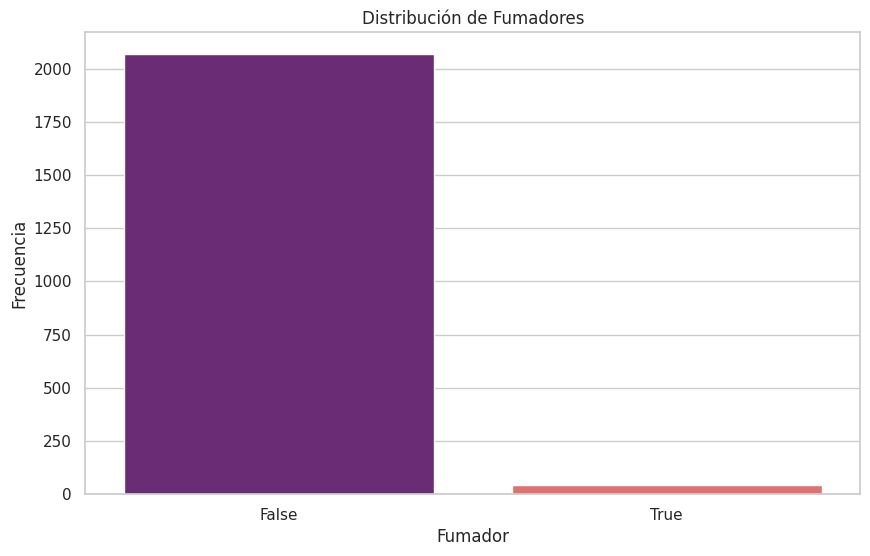

In [8]:
# Historia Familiar de Sobrepeso
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', data=data, palette='viridis')
plt.title('Distribución de Historia Familiar de Sobrepeso')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()

# Fumadores
plt.figure(figsize=(10, 6))
sns.countplot(x='SMOKE_yes', data=data, palette='magma')
plt.title('Distribución de Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')
plt.show()


Gráficos de Cajas y Bigotes (Boxplots)

<ipython-input-9-d7b0aa2fe991>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='FAF', data=data, palette='pastel')


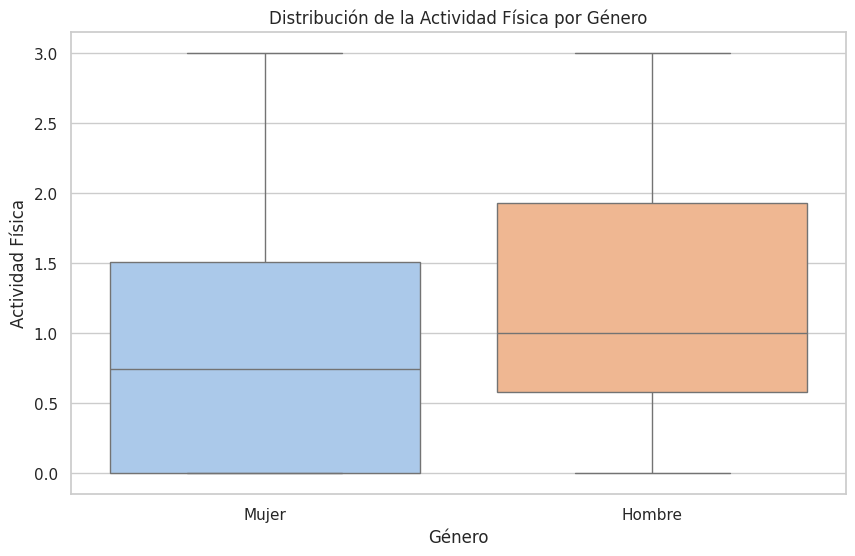

<ipython-input-9-d7b0aa2fe991>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='TUE', data=data, palette='muted')


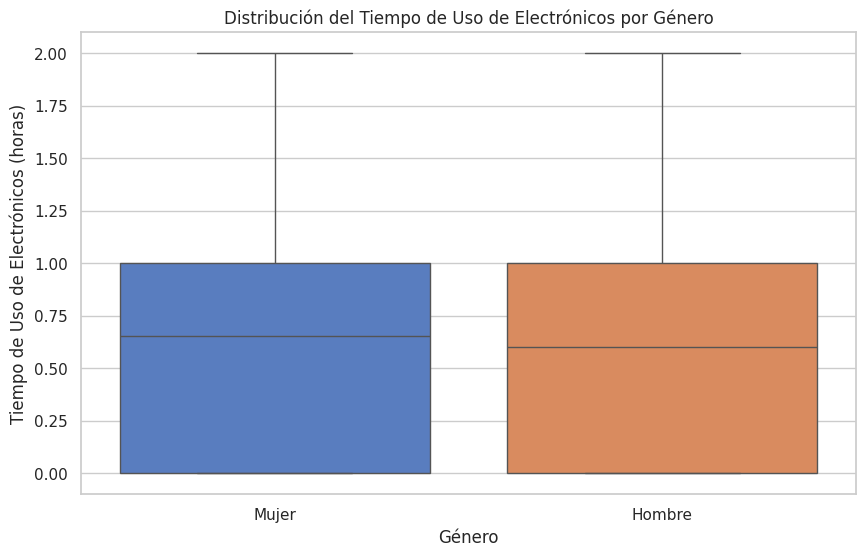

In [9]:
# Actividad Física por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='FAF', data=data, palette='pastel')
plt.title('Distribución de la Actividad Física por Género')
plt.xlabel('Género')
plt.ylabel('Actividad Física')
plt.show()

# Tiempo de Uso de Electrónicos por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='TUE', data=data, palette='muted')
plt.title('Distribución del Tiempo de Uso de Electrónicos por Género')
plt.xlabel('Género')
plt.ylabel('Tiempo de Uso de Electrónicos (horas)')
plt.show()


Gráficos de Violín (Violin Plots)

<ipython-input-10-ae2419e1a6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=data, palette='coolwarm', split=True)


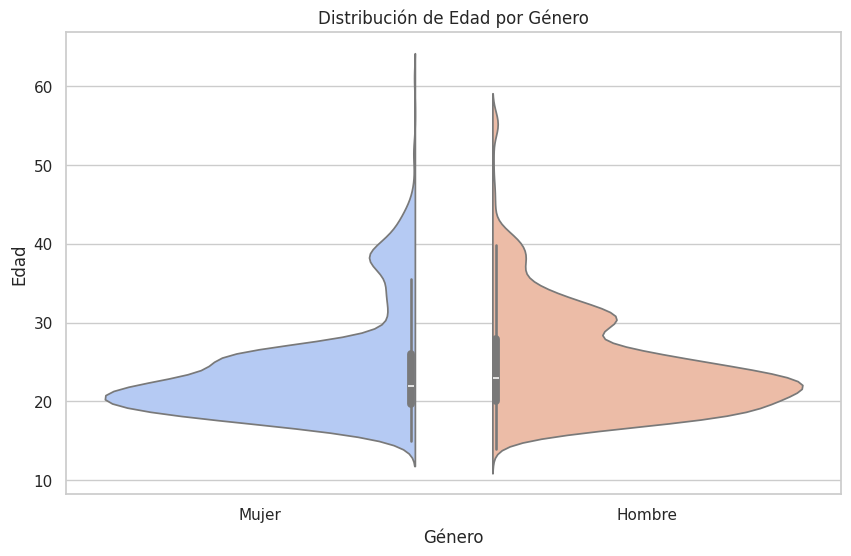

<ipython-input-10-ae2419e1a6b5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='BMI', data=data, palette='coolwarm', split=True)


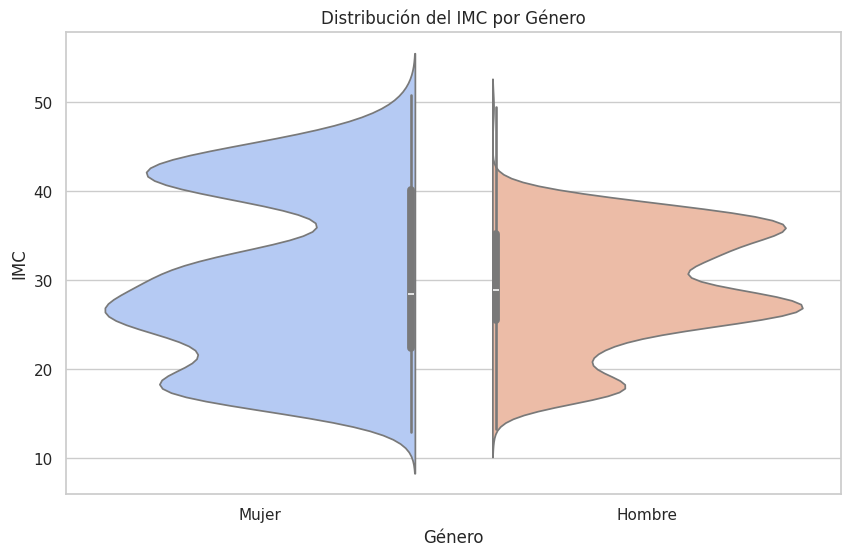

In [10]:
# Edad por Género
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=data, palette='coolwarm', split=True)
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

# IMC por Género
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='BMI', data=data, palette='coolwarm', split=True)
plt.title('Distribución del IMC por Género')
plt.xlabel('Género')
plt.ylabel('IMC')
plt.show()


Gráficos de Dispersión (Scatter Plots)

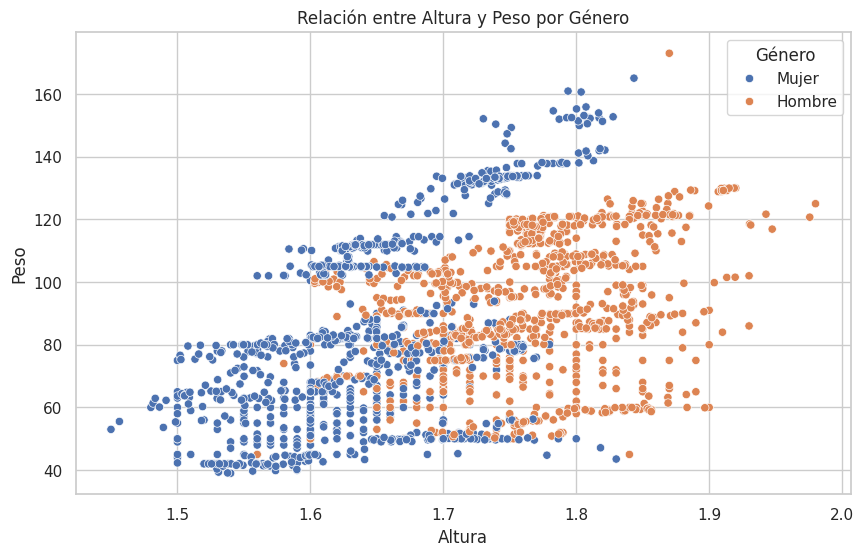

In [11]:
# Altura vs Peso por Género
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=data, palette='deep')
plt.title('Relación entre Altura y Peso por Género')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(title='Género')
plt.show()


Mapas de Calor (Heatmaps)

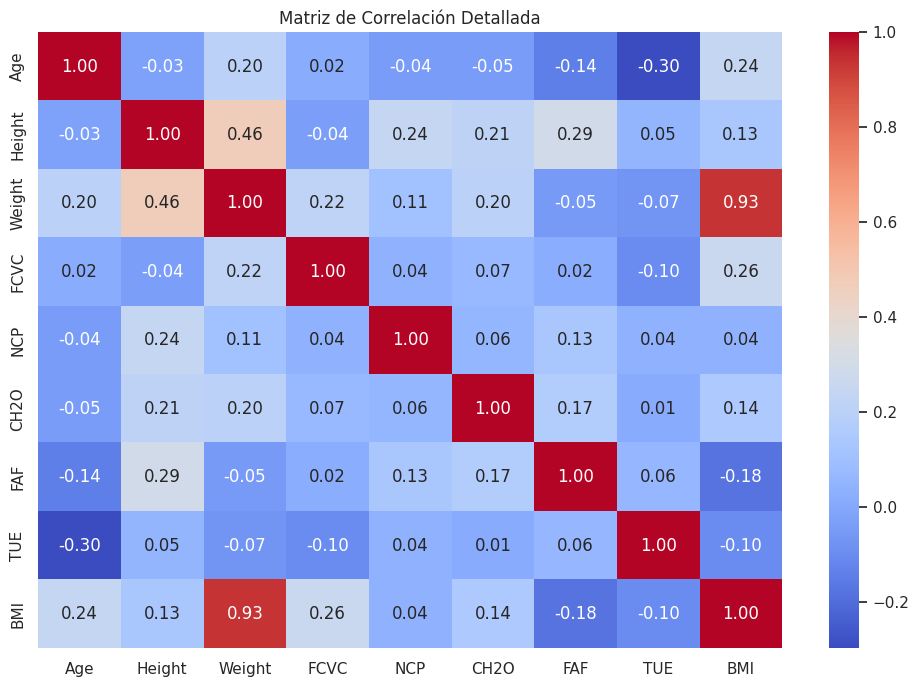

In [12]:
# Matriz de Correlación Detallada
numeric_data = data.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación Detallada')
plt.show()


Análisis Diagnóstico

Distribución de Obesidad por Género

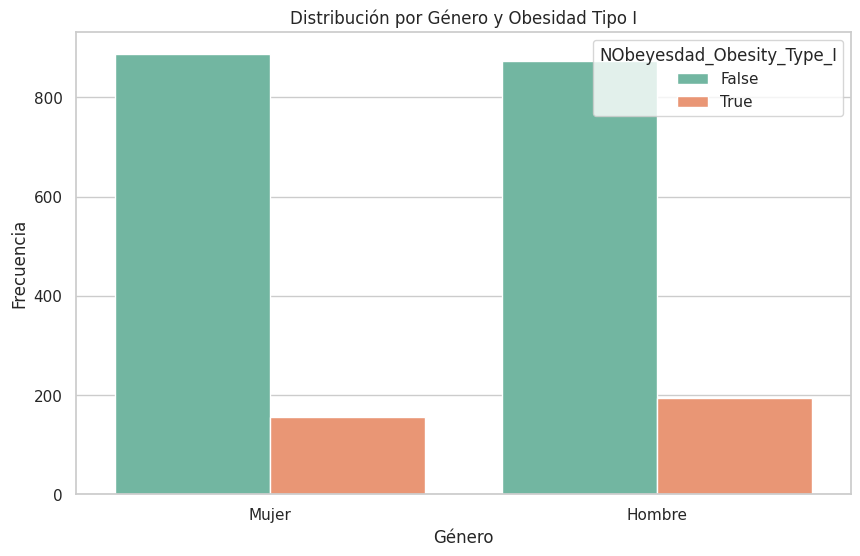

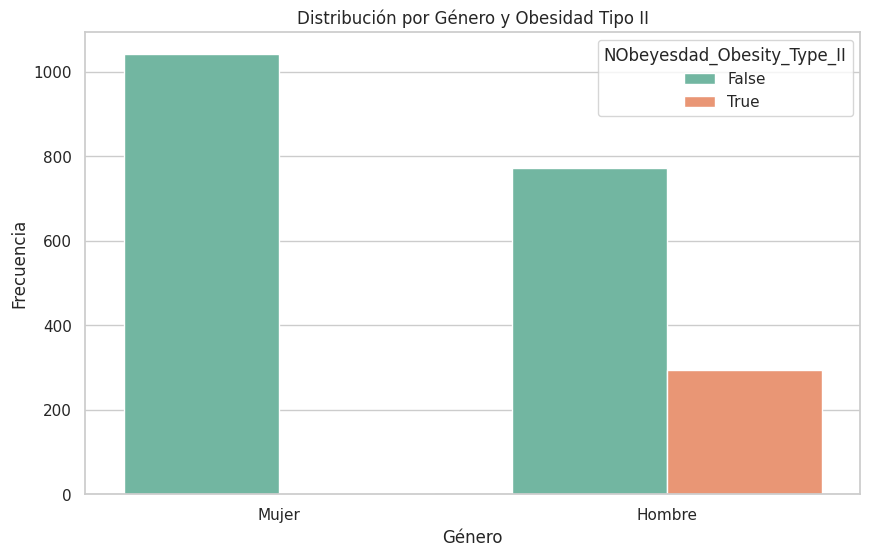

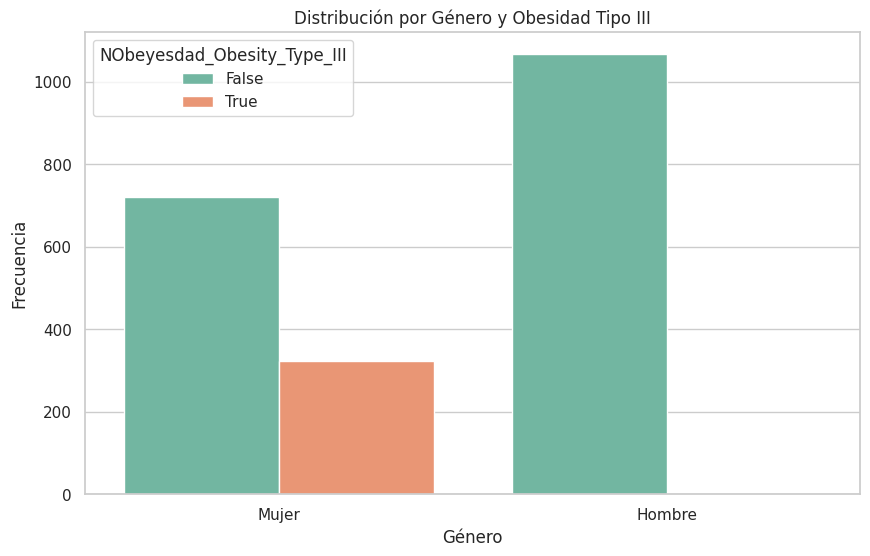

In [13]:
# Obesidad Tipo I por Género
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='NObeyesdad_Obesity_Type_I', data=data, palette='Set2')
plt.title('Distribución por Género y Obesidad Tipo I')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Obesidad Tipo II por Género
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='NObeyesdad_Obesity_Type_II', data=data, palette='Set2')
plt.title('Distribución por Género y Obesidad Tipo II')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Obesidad Tipo III por Género
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='NObeyesdad_Obesity_Type_III', data=data, palette='Set2')
plt.title('Distribución por Género y Obesidad Tipo III')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


Análisis de Comorbilidades y Obesidad

<ipython-input-16-84f1feb473db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad_Obesity_Type_I', y='Age', data=data, palette='Set3')


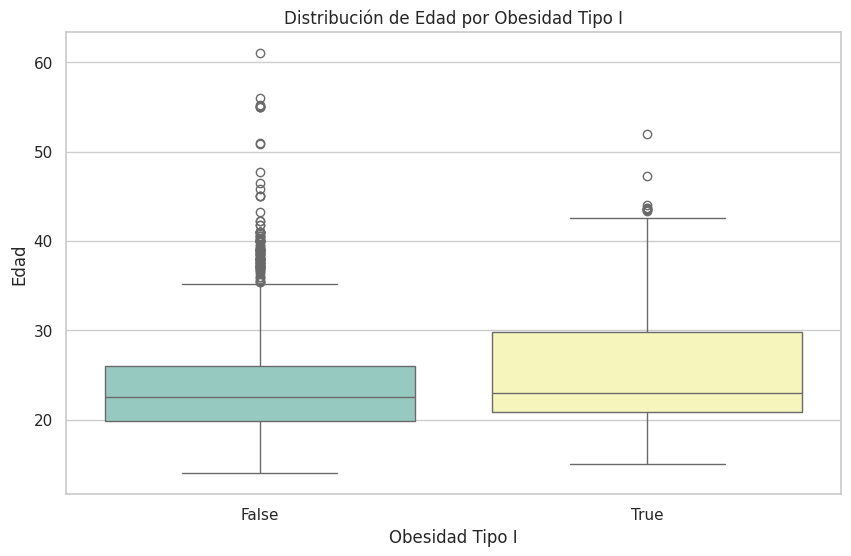

<ipython-input-16-84f1feb473db>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad_Obesity_Type_II', y='Age', data=data, palette='Set3')


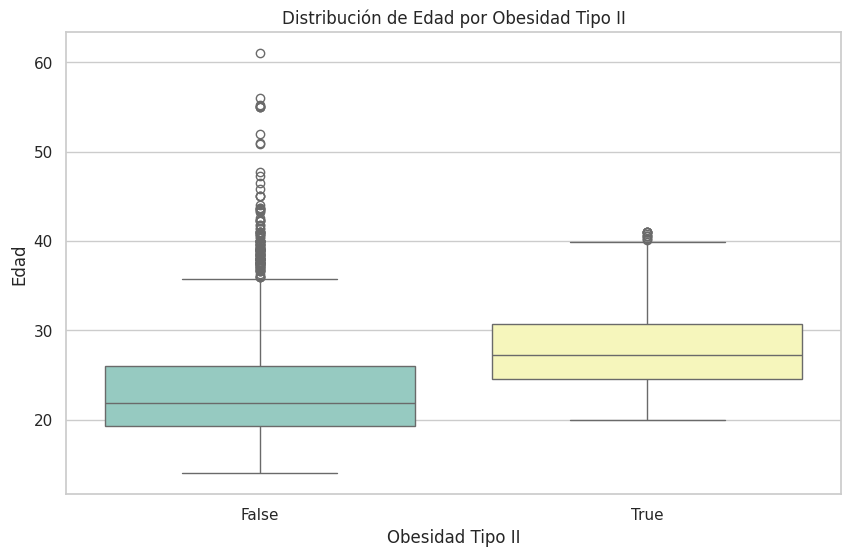

<ipython-input-16-84f1feb473db>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad_Obesity_Type_III', y='Age', data=data, palette='Set3')


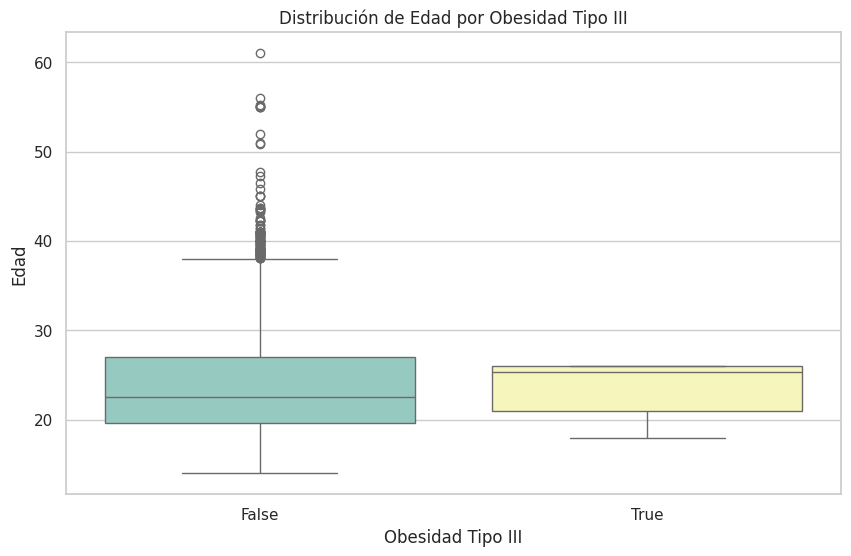

<ipython-input-16-84f1feb473db>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad_Obesity_Type_I', y='BMI', data=data, palette='Set3')


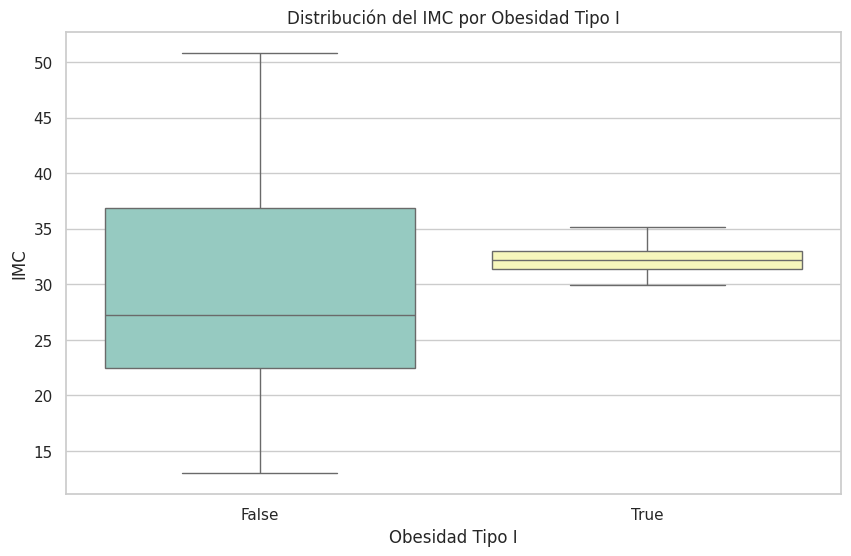

<ipython-input-16-84f1feb473db>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad_Obesity_Type_II', y='BMI', data=data, palette='Set3')


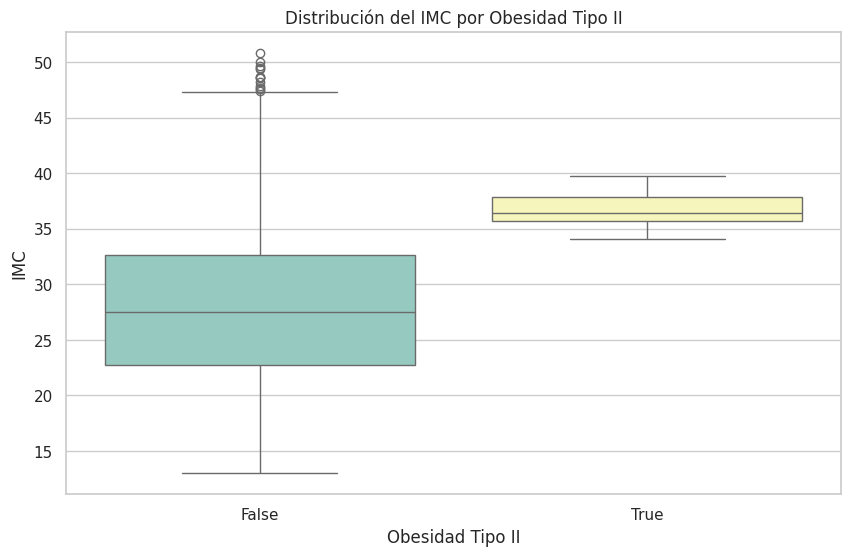

<ipython-input-16-84f1feb473db>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad_Obesity_Type_III', y='BMI', data=data, palette='Set3')


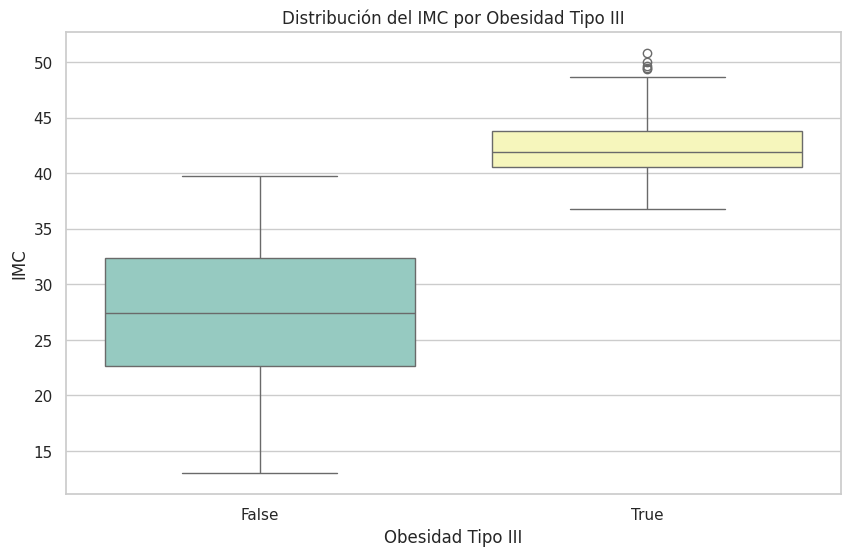

In [16]:
# Edad por Nivel de Obesidad Tipo I
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_I', y='Age', data=data, palette='Set3')
plt.title('Distribución de Edad por Obesidad Tipo I')
plt.xlabel('Obesidad Tipo I')
plt.ylabel('Edad')
plt.show()

# Edad por Nivel de Obesidad Tipo II
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_II', y='Age', data=data, palette='Set3')
plt.title('Distribución de Edad por Obesidad Tipo II')
plt.xlabel('Obesidad Tipo II')
plt.ylabel('Edad')
plt.show()

# Edad por Nivel de Obesidad Tipo III
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_III', y='Age', data=data, palette='Set3')
plt.title('Distribución de Edad por Obesidad Tipo III')
plt.xlabel('Obesidad Tipo III')
plt.ylabel('Edad')
plt.show()

# IMC por Nivel de Obesidad Tipo I
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_I', y='BMI', data=data, palette='Set3')
plt.title('Distribución del IMC por Obesidad Tipo I')
plt.xlabel('Obesidad Tipo I')
plt.ylabel('IMC')
plt.show()

# IMC por Nivel de Obesidad Tipo II
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_II', y='BMI', data=data, palette='Set3')
plt.title('Distribución del IMC por Obesidad Tipo II')
plt.xlabel('Obesidad Tipo II')
plt.ylabel('IMC')
plt.show()

# IMC por Nivel de Obesidad Tipo III
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad_Obesity_Type_III', y='BMI', data=data, palette='Set3')
plt.title('Distribución del IMC por Obesidad Tipo III')
plt.xlabel('Obesidad Tipo III')
plt.ylabel('IMC')
plt.show()



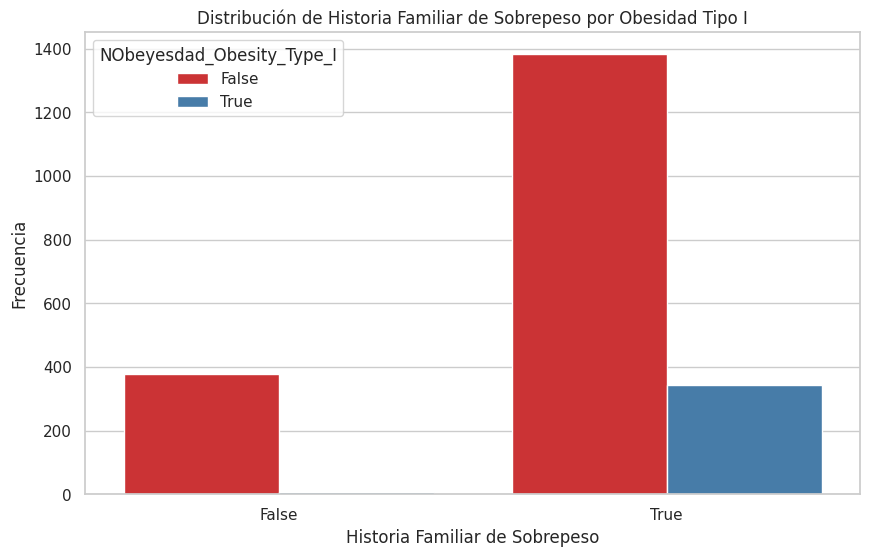

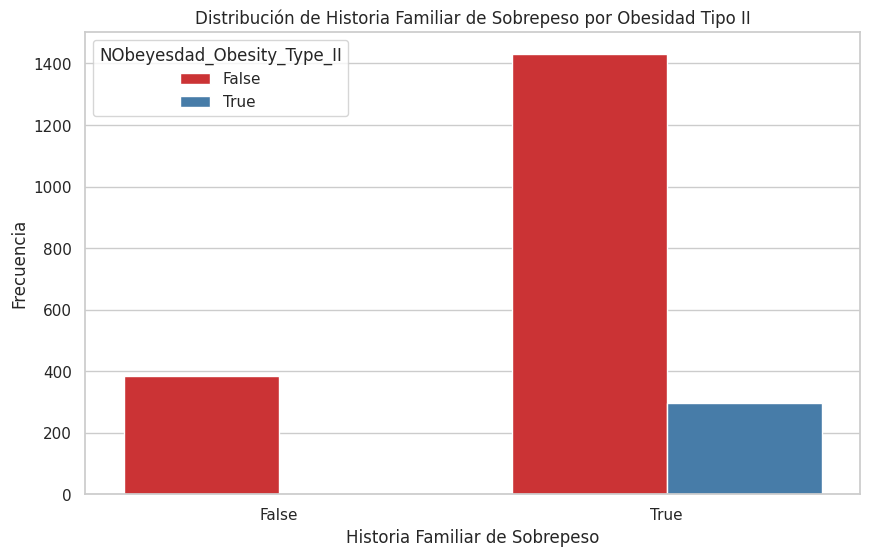

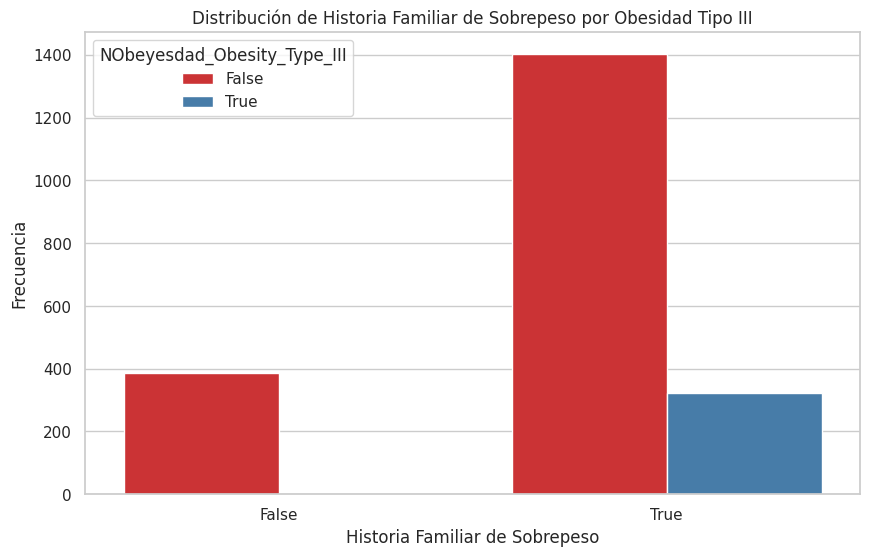

In [18]:
# Historia Familiar de Sobrepeso y Obesidad Tipo I
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', hue='NObeyesdad_Obesity_Type_I', data=data, palette='Set1')
plt.title('Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo I')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()

# Historia Familiar de Sobrepeso y Obesidad Tipo II
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', hue='NObeyesdad_Obesity_Type_II', data=data, palette='Set1')
plt.title('Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo II')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()

# Historia Familiar de Sobrepeso y Obesidad Tipo III
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight_yes', hue='NObeyesdad_Obesity_Type_III', data=data, palette='Set1')
plt.title('Distribución de Historia Familiar de Sobrepeso por Obesidad Tipo III')
plt.xlabel('Historia Familiar de Sobrepeso')
plt.ylabel('Frecuencia')
plt.show()
